In [58]:
# First we need to Import the python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display the max (rows and columns) in DataFrame
pd.set_option("Display.max_rows", None)
pd.set_option("Display.max_columns", None)

# Data Loading and Preparation:

In [3]:
# Read the data set 
df = pd.read_csv("Data Science - Intern - Data Set(copy).csv")

In [4]:
# To check the total number of rows & columns
df.shape

(18434, 141)

In [5]:
# To check the top 5 rows of the dataset 
df.head()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,engineoiltemp,imap,vehiclespeed,warmups,rpm,obddistance,maf,fuelrail,runtime,mil,obdstandards,telltale,pto_drive_engagement,engine_torque_percent,service_distance,gross_combination_vehicle_weight,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vehicle_weight,air_suspension_pressure_front_axle_left,air_suspension_pressure_front_axle_right,air_suspension_pressure_rear_axle_left,air_suspension_pressure_rear_axle_right,state_of_charge,battery_pack_voltage,battery_pack_current,power,pluscode,lamp_status,hydraulic_oil_filter,air_filter,no_charging,low_fuel,engine_temp_high,hydraulic_oil_temp_high,water_in_fuel,low_oil_pressure,roller_speed,vibration_status,axle_position,tire_position,tire_pressure,tire_temperature,tire_air_leakage_rate,tire_sensor_enable_status,tire_status,tire_sensor_electric_fault,extended_tire_pressure_support,tire_pressure_threshold_detection,extended_tire_pressure,cpc_system_type,required_tire_pressure,cpc_tire_id,cpc_graphical_position,cpc_tire_location,cpc_ttm_id,barometric_pressure,secondary_air_status,catalyst_temperature_bank1_sensor1,catalyst_temperature_bank1_sensor2,distance_since_mil,commanded_egr,egr_error,drive_cycle_status,ambient_air_temperature,fuel_system_status,short_term_fuel_trim_bank_1,long_term_fuel_trim_bank_1,timing_advance,oxygen_sensors_present,oxygen_sensor_1_voltage,oxygen_sensor_2_voltage,commanded_evaporative_purge,control_module_voltage,absolute_load_value,relative_throttle_position,oxygen_sensor_1_short_term_fuel_trim,oxygen_sensor_2_short_term_fuel_trim,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,engine_airlet_pressure,engine_oil_pressure,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,engine_pto_switch_status,clientid,alerttype,alertvalue,from_ts,to_ts,server_ts,to_lat,to_lng,tripid,alert_completed,view_status,scheduled_start_loc,scheduled_end_loc,vehiclenumber,areaandroute,type,breached_in_userid,alerted_to_in_userid,breached_out_userid,alerted_to_out_userid,alert_generated_by_app_userid,alert_ended_by_app_userid,request_id,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,NaN,1774.9688,NaN,0.00000,NaN,749.000,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,21,NaN,NaN,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,NaN,NaN,0,1,102,Released,Released,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,NaN,1774.9688,NaN,0.00000,NaN,1208.375,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,18,NaN,NaN,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,NaN,NaN,19,2,102,Released,Pressed,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,NaN,1774.9688,NaN,1.40625,NaN,752.625,60780800,NaN,NaN,1

In [6]:
# To indentify the datatype of each variables in the dataset
print(df.dtypes)

uniqueid                                     object
ts                                            int64
lat                                         float64
lng                                         float64
external_bat_voltage                        float64
internal_bat_voltage                        float64
engineload                                    int64
tanklevel                                   float64
throttle                                    float64
coolant                                       int64
intakeairtemp                               float64
engineoiltemp                               float64
imap                                        float64
vehiclespeed                                float64
warmups                                     float64
rpm                                         float64
obddistance                                   int64
maf                                         float64
fuelrail                                    float64
runtime     

In [7]:
# To check how many null values in the dataset
df.isnull().sum()

uniqueid                                        0
ts                                              0
lat                                             0
lng                                             0
external_bat_voltage                        18434
internal_bat_voltage                        18434
engineload                                      0
tanklevel                                   18434
throttle                                    18434
coolant                                         0
intakeairtemp                               18434
engineoiltemp                                   0
imap                                        18434
vehiclespeed                                    0
warmups                                     18434
rpm                                             0
obddistance                                     0
maf                                         18434
fuelrail                                    18434
runtime                                        14


# Data Cleaning and Preprocessing:

In [8]:
# Drop the columns that contain all null values in the Dataset
cleaned_df = df.dropna(axis=1, how="all")

# Drop the categorical columns which has no use
cleaned_df = cleaned_df.drop(["uniqueid", "pluscode","can_raw_data"],axis=1)

# Again check whether the columns that contain all the null values has removed or not?
cleaned_df.isnull().sum()

ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
vibration_status                           0
engine_throttle_valve1_pos                 0
engine_throttle_valve2_pos                 0
enginefuel

In [9]:
# Final check, that how many columns in your Dataset now
cleaned_df.shape

(18434, 30)

In [10]:
# To generate the Descriptive Statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. 
cleaned_df.describe(include="all")

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
count,1.843400e+04,18434.000000,18434.000000,18434.000000,18434.000000,1.843400e+04,18434.000000,18434.000000,1.843400e+04,18420.000000,18434.000000,18434.0,18434.000000,18434.000000,18432.000000,18434.000000,18434.000000,18434.000000,18434.000000,18434.0,18434.000000,18434.0,18434.0,18434.000000,18434.000000,18434.0,18434,18434,18434,14770.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Released,Pressed,Released,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16752,15346,16807,NaN
mean,1.711641e+09,18.724254,78.865351,38.141206,84.571336,1.774969e+03,33.361762,937.044090,6.650076e+07,2132.411732,28.043561,130.0,13.550071,19533.068922,54.993837,200.705726,9.320809,25.029692,34.954519,0.0,99.657546,102.0,215.0,28.044483,4.983780,102.0,NaN,NaN,NaN,84.795315
std,1.275937e+06,0.816184,3.208032,29.889358,7.718346,6.105149e-10,17.929579,327.003819,3.256334e+06,92.454295,22.529955,0.0,20.066883,919.104693,26.765985,97.712915,8.205254,43.331629,34.994579,0.0,3.934917,0.0,0.0,28.824737,5.249083,0.0,NaN,NaN,NaN,15.571199
min,1.709341e+09,0.000000,0.000000,0.000000,30.000000,1.774969e+03,0.000000,0.000000,6.078080e+07,1970.850000,0.000000,130.0,0.000000,17935.500000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,21.200000,102.0,215.0,0.000000,1.000000,102.0,NaN,NaN,NaN,44.400000
25%,1.710903e+09,18.701308,78.758909,10.000000,83.000000,1.774969e+03,22.359375,757.250000,6.373487e+07,2053.300000,7.000000,130.0,0.000000,18744.500000,32.800000,119.720000,1.850000,1.933594,0.000000,0.0,100.000000,102.0,215.0,0.000000,1.000000,102.0,NaN,NaN,NaN,68.800000
50%,1.711692e+09,18.853032,79.092408,31.000000,85.000000,1.774969e+03,38.187500,950.812500,6.653239e+07,2133.125000,22.000000,130.0,15.000000,19542.500000,57.200000,208.780000,6.350000,3.456055,32.800000,0.0,100.000000,102.0,215.0,23.000000,2.000000,102.0,NaN,NaN,NaN,88.400000
75%,1.712682e+09,18.921385,79.352821,64.000000,89.000000,1.774969e+03,47.011719,1157.500000,6.940603e+07,2213.800000,48.000000,130.0,17.000000,20341.000000,77.200000,281.780000,16.850000,20.906250,68.400000,0.0,100.000000,102.0,215.0,56.000000,9.000000,102.0,NaN,NaN,NaN,99.200000


In [11]:
# How to count the unique values in a column
value_counts_random_col = cleaned_df['engineoiltemp'].value_counts()
print(value_counts_random_col)

engineoiltemp
1774.9688    18434
Name: count, dtype: int64


## We have missing values in these columns only: ["runtime","fuel_level","adblue_level"]

In [12]:
# To check for the outliers by using interquartile range (IQR) for these particular columns only

columns_to_check_outliers = ["runtime","fuel_level","adblue_level"]
for col in columns_to_check_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = cleaned_df[(cleaned_df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    if not outliers.empty:
        print(f"Outliers found in column '{col}':")
        print(outliers)

## There are no outliers from the above methode

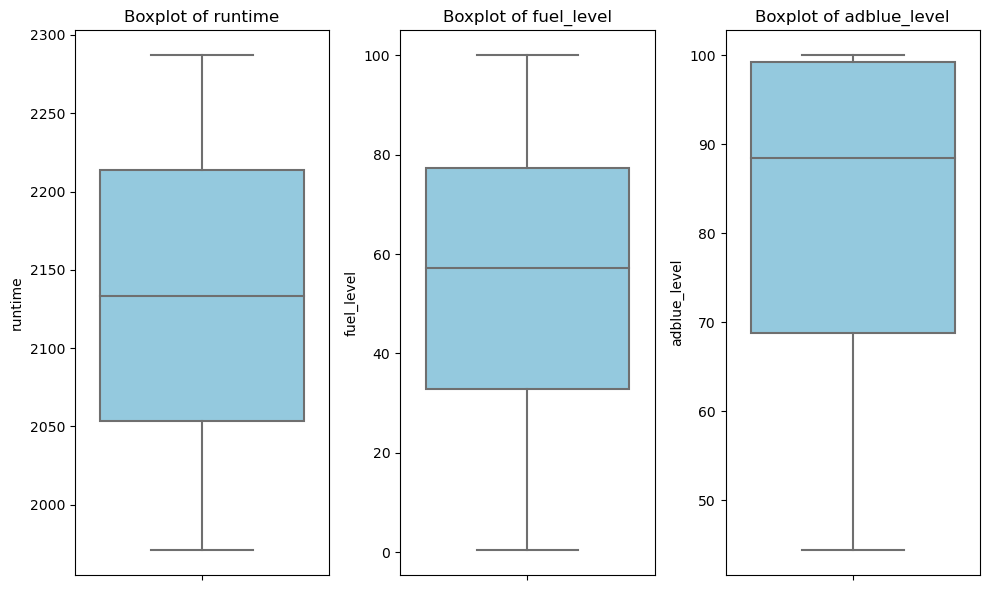

In [13]:
# We have another way of finding the outliers by using boxplot

# Determine the figure size
plt.figure(figsize = (10,6))

# Iterate over each column and create a boxplot
for i, col in enumerate(columns_to_check_outliers, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=cleaned_df[col], color='skyblue', orient='v')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## As You can see from the above boxplots their are no outliers in these variables.

In [14]:
# To replace the missing values with mean only, because thier are no outliers in these columns values.

cleaned_df['runtime'] = cleaned_df['runtime'].fillna(cleaned_df['runtime'].mean().round()) 

cleaned_df['fuel_level'] = cleaned_df['fuel_level'].fillna(cleaned_df['fuel_level'].mean().round())

cleaned_df['adblue_level'] = cleaned_df['adblue_level'].fillna(cleaned_df['adblue_level'].mean().round())

In [15]:
# Now their are no missing values in our Dataset
cleaned_df.isnull().sum()

ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
engineoiltemp                           0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
selected_gear                           0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
vibration_status                        0
engine_throttle_valve1_pos              0
engine_throttle_valve2_pos              0
enginefueltemp                          0
drivers_demand_engine_torque_perce

In [16]:
# Check for duplicate records
duplicates = cleaned_df[cleaned_df.duplicated()]

if not duplicates.empty:
    print("Duplicate records found:")
    print(duplicates)
    print()

    # Drop duplicate records
    df.drop_duplicates(inplace=True)
    print("DataFrame after dropping duplicates:")
    print(cleaned_df)
else:
    print("No duplicate records found.")


No duplicate records found.


In [17]:
# To check the outliers in the DataFrame for numerical columns only
numerical_cols = cleaned_df.select_dtypes(include=['float64','int64'])

for col in numerical_cols:
    q1 = numerical_cols[col].quantile(0.25)
    q3 = numerical_cols[col].quantile(0.75)
    iqr = q3 - q1
    outliers = numerical_cols[(numerical_cols[col] < q1 - 1.5 * iqr) | (numerical_cols[col] > q3 + 1.5 * iqr)]
    if not outliers.empty:
        print(f"Outliers found in {col} :", outliers.shape[0])
        

Outliers found in lat : 2390
Outliers found in lng : 30
Outliers found in coolant : 1084
Outliers found in rpm : 1161
Outliers found in current_gear : 474
Outliers found in fuel_economy : 2837
Outliers found in engine_throttle_valve1_pos : 1485
Outliers found in adblue_level : 116


In [18]:
#Handling the Outliers

for col in numerical_cols:
    q1 = numerical_cols[col].quantile(0.25)
    q3 = numerical_cols[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    numerical_cols = numerical_cols[(numerical_cols[col] >= lower_bound) & (numerical_cols[col] <= upper_bound)]


In [19]:
numerical_cols.shape

(11468, 27)

# Correlation Heatmap

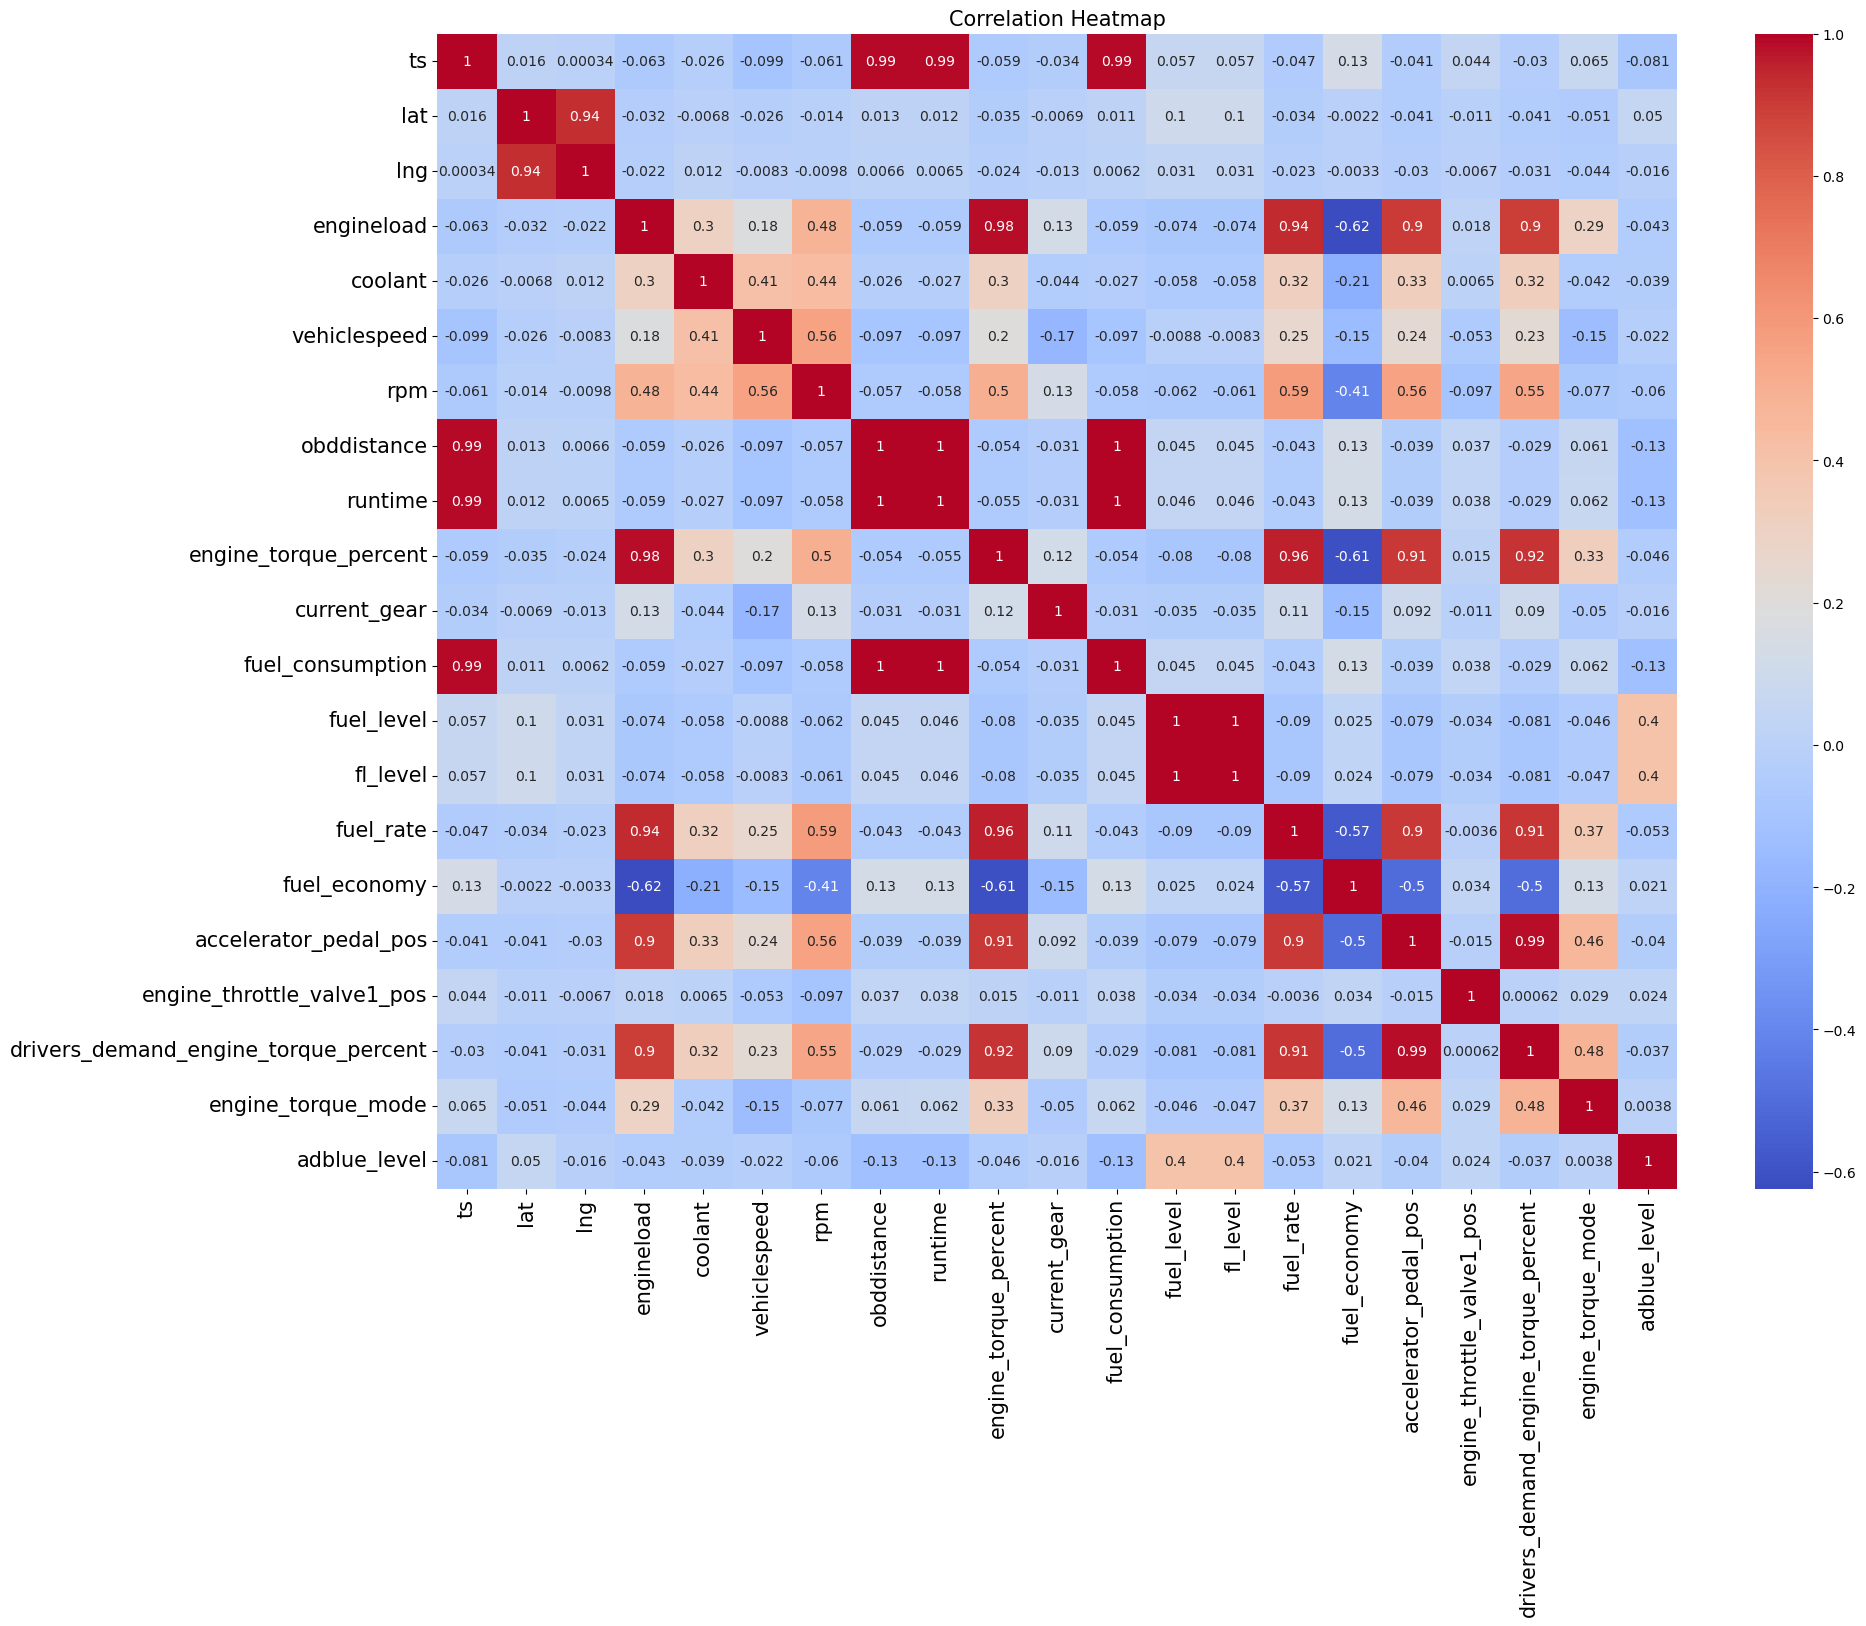

In [20]:
# Select numerical columns only for heatmap
numerical_columns = cleaned_df.select_dtypes(include=['float64','int64'])

# Drop the columns that contain repeated values
cleaned_df_correlation = numerical_columns.drop(["selected_gear","engineoiltemp","vibration_status","engine_throttle_valve2_pos","enginefueltemp","accelerator_pedal_pos_2"], axis=1)

# Correlation heatmap for numerical features
plt.figure(figsize=(20, 15))
sns.heatmap(cleaned_df_correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Observation: Based on the heatmap analysis, significant correlations between variables have been identified, indicating strong relationships. These findings help prioritize which variables are crucial for further detailed data analysis and exploration.

# Exploratory Data Analysis:

# Univariate Analysis for numerical features

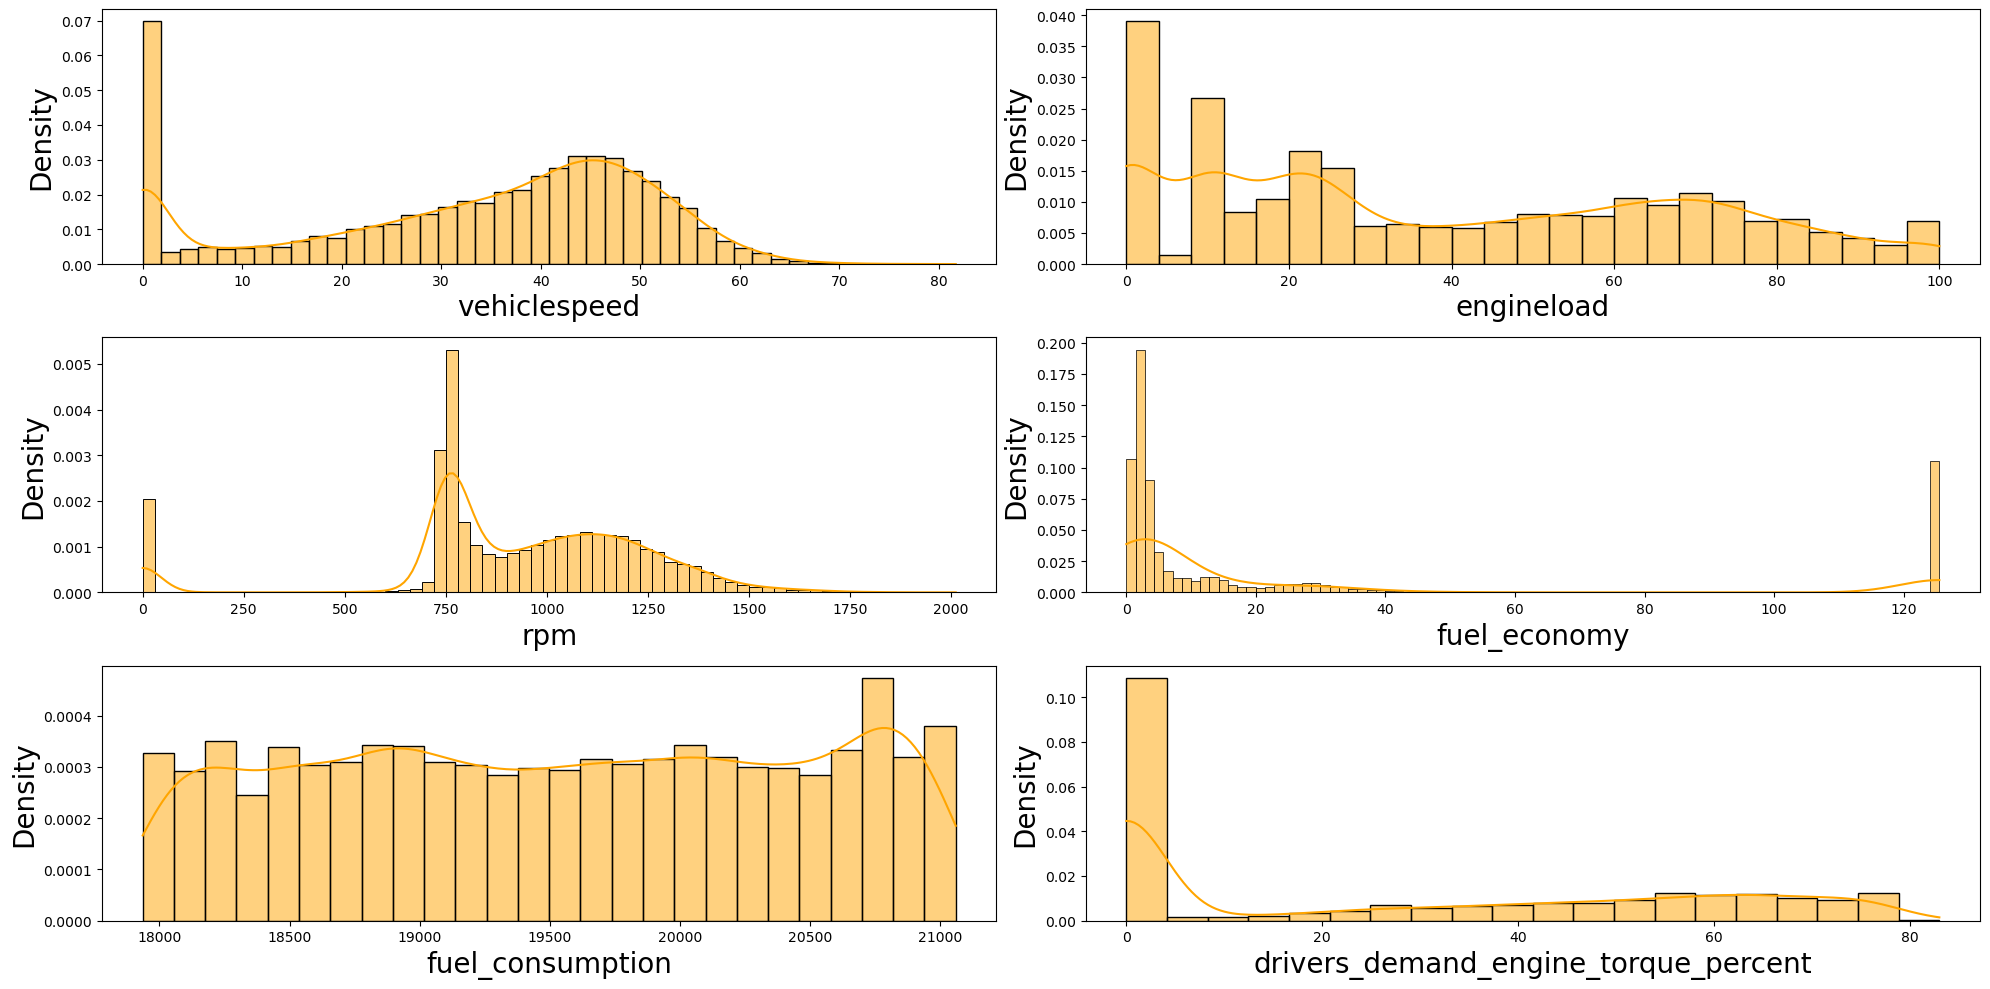

In [57]:
plt.figure(figsize=(20,10))
columns = ['vehiclespeed','engineload','rpm','fuel_economy','fuel_consumption','drivers_demand_engine_torque_percent']

for count,i in enumerate(columns):
    plt.subplot(3,2,count+1)
    sns.histplot(data=cleaned_df, x=i, kde=True, stat='density', color='orange')
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Density', fontsize=20)
plt.tight_layout()
plt.show()

## Observation: as we can see majority of the hist plot is showing skewed data which means there is no normal distribution among the features.

# Univariate Analysis for Categorical features

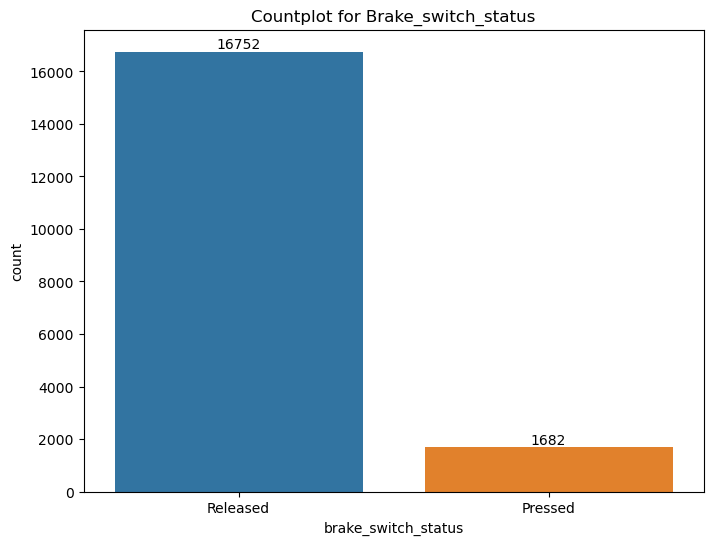

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=cleaned_df, x="brake_switch_status")
plt.title("Countplot for Brake_switch_status")
for container in ax.containers:
    ax.bar_label(container)

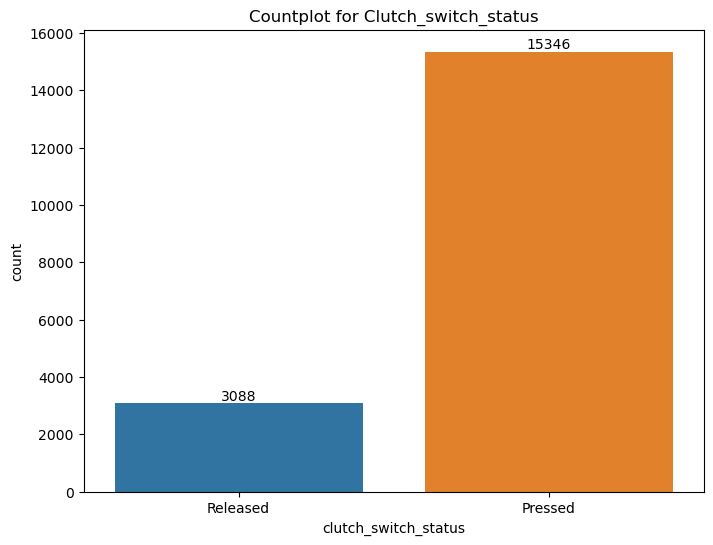

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=cleaned_df, x="clutch_switch_status")
plt.title("Countplot for Clutch_switch_status")
for container in ax.containers:
    ax.bar_label(container)

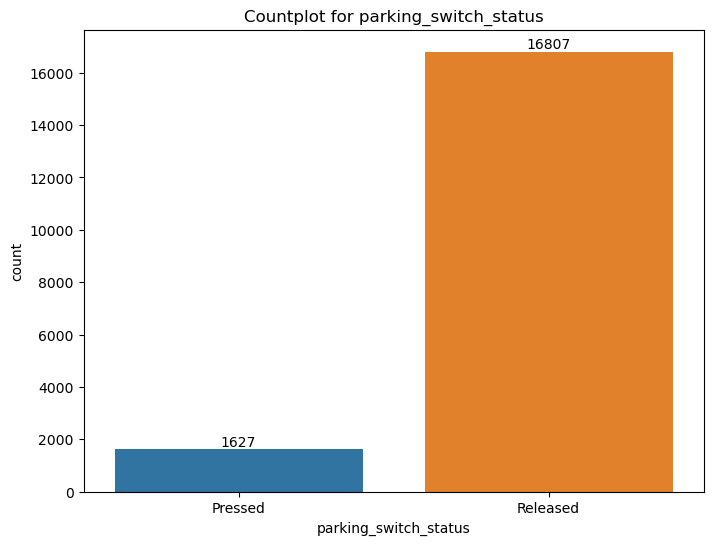

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=cleaned_df, x="parking_switch_status")
plt.title("Countplot for parking_switch_status")
for container in ax.containers:
    ax.bar_label(container)

In [27]:
# To show the top 5 rows from the Dataset
cleaned_df.head()

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,1970.85,21,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,100.0,102,215,0,1,102,Released,Released,Pressed,85.0
1,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,1970.85,18,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,0,99.6,102,215,19,2,102,Released,Pressed,Pressed,85.0
2,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,1970.85,18,130,129,17936.0,22.8,83.22,4.70,0.337891,0.0,0,99.6,102,215,0,1,102,Pressed,Pressed,Released,85.0
3,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,1970.90,27,130,129,17936.0,20.4,74.46,8.60,0.121094,33.6,0,99.6,102,215,28,2,102,Released,Pressed,Released,85.0
4,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,1970.90,1,130,3,17936.0,23.2,84.68,0.00,125.500000,3.2,0,100.0,102,215,1,2,102,Released,Pressed,Released,85.0


In [85]:
cleaned_df.dtypes

ts                                        int64
lat                                     float64
lng                                     float64
engineload                                int64
coolant                                   int64
engineoiltemp                           float64
vehiclespeed                            float64
rpm                                     float64
obddistance                               int64
runtime                                 float64
engine_torque_percent                     int64
selected_gear                             int64
current_gear                              int64
fuel_consumption                        float64
fuel_level                              float64
fl_level                                float64
fuel_rate                               float64
fuel_economy                            float64
accelerator_pedal_pos                   float64
vibration_status                          int64
engine_throttle_valve1_pos              

# Bivariate Analysis

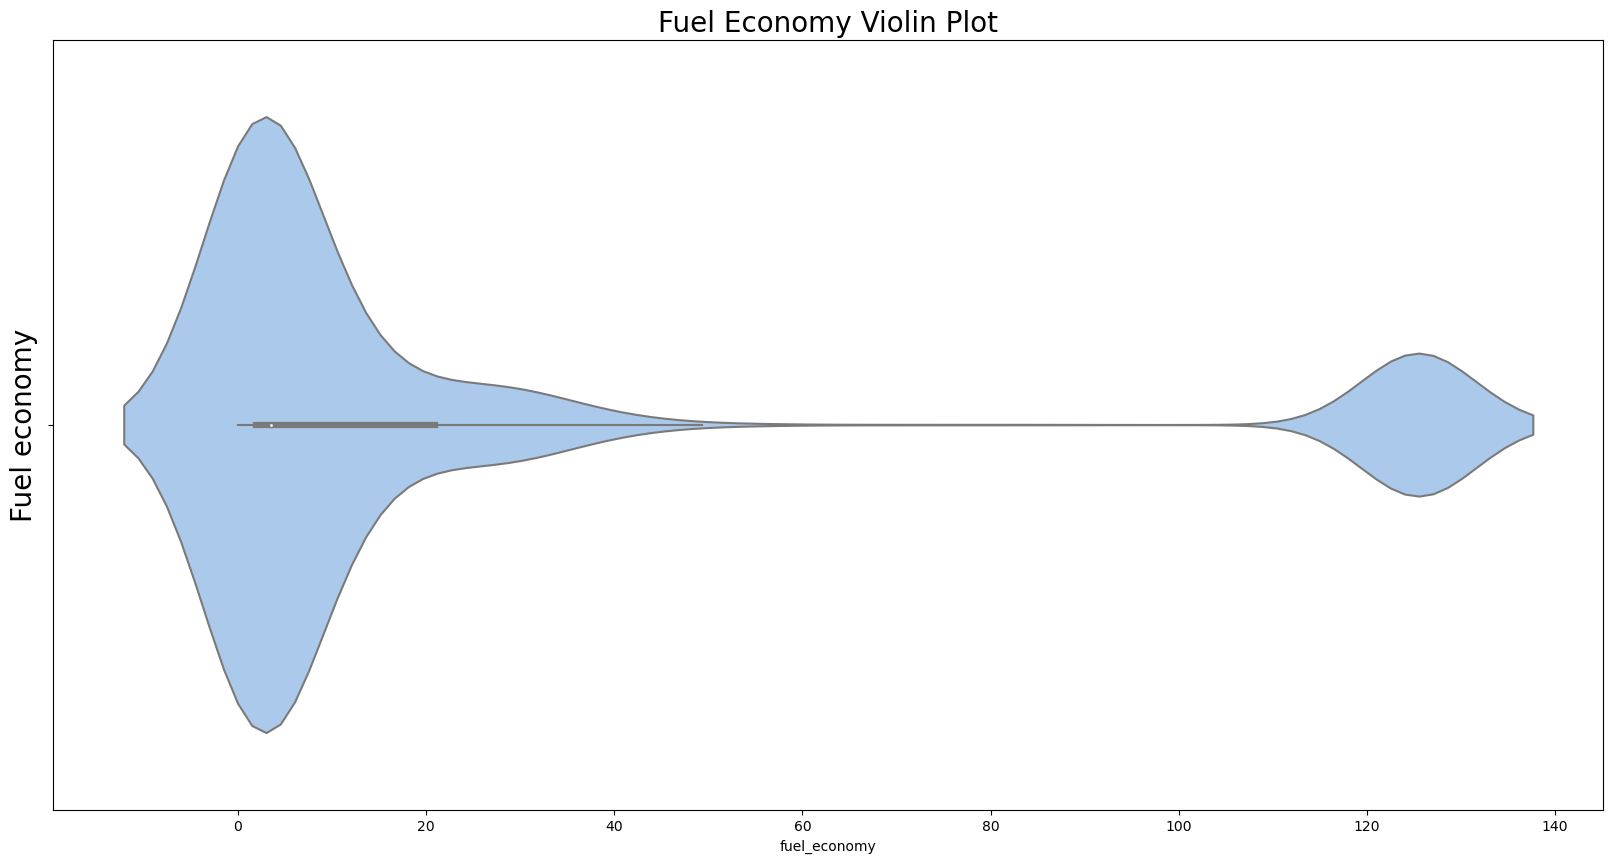

In [86]:
# To determine the figuresize
plt.figure(figsize=(20,10))

# To create a violinplot
sns.violinplot(data=cleaned_df, x='fuel_economy', hue='engine_torque_mode', palette='pastel')
plt.title('Fuel Economy Violin Plot', fontsize=20)
plt.ylabel('Fuel economy', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Relationship between Accelerator pedal pos and Fuel Rate')

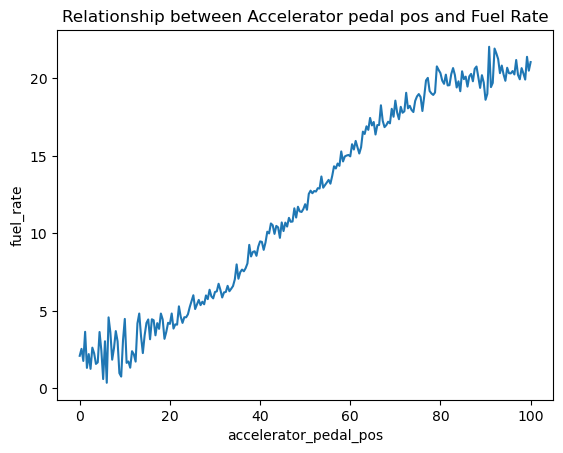

In [45]:
# To create a lineplot
sns.lineplot(data=cleaned_df, x='accelerator_pedal_pos', y='fuel_rate', palette='bright', errorbar=None)
plt.title("Relationship between Accelerator pedal pos and Fuel Rate")

## This linechart shows the relationship between accelerator pedal pos vs fuel rate that if the accelerator increases than it increases the fuel consumptions so fuel rate also increased

Text(0.5, 1.0, 'Relationship between Drivers demand torque and Accelerator_pedal_pos')

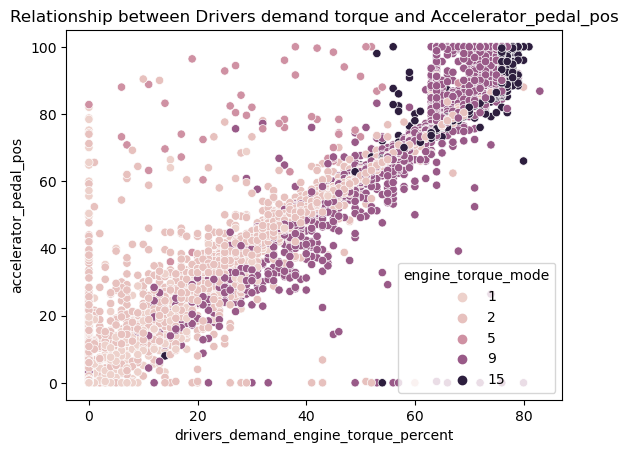

In [31]:
# To create a scatterplot
sns.scatterplot(data= cleaned_df, x= 'drivers_demand_engine_torque_percent', y= 'accelerator_pedal_pos', hue='engine_torque_mode')
plt.title("Relationship between Drivers demand torque percent and Accelerator_pedal_pos")

## As you can see from the above relationship between accelerator pedal position and drivers torque percent shows that as the accelerator pedal is pressed more, indicating a higher demand for power, the system responds by increasing torque output, potentially engaging a high torque mode to meet the driver's demand.

Text(0.5, 1.0, 'Relationship between rpm and Fuel Rate')

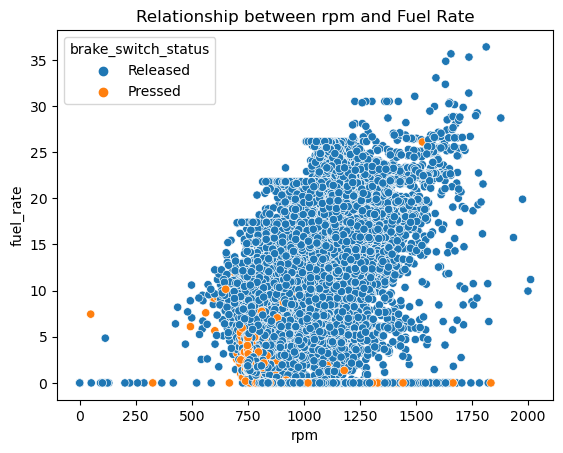

In [33]:
sns.scatterplot(data= cleaned_df, x= 'rpm', y= 'fuel_rate', hue='brake_switch_status')
plt.title("Relationship between rpm and Fuel Rate")

## From the above relationship it indicates that engine RPM and fuel consumption are directly influenced by whether the brake switch is pressed or released. This understanding is crucial for optimizing fuel efficiency and understanding engine performance dynamics during different driving conditions.

Text(0.5, 1.0, 'Relationship between Fuel Consumption and Fuel Rate According to Brake Engagement')

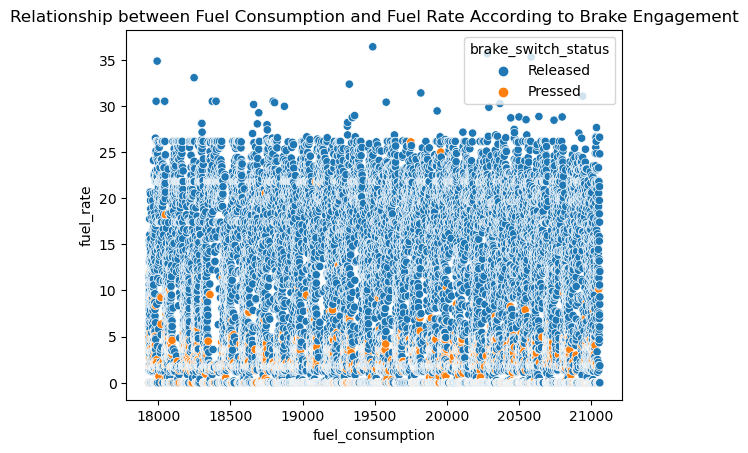

In [38]:
sns.scatterplot(data= cleaned_df, x= 'fuel_consumption', y= 'fuel_rate', hue='brake_switch_status')
plt.title("Relationship between Fuel Consumption and Fuel Rate According to Brake Engagement")

## This relationship shows that if the brake envolves more it affects the fuel consumption and increase the fuel rate as well

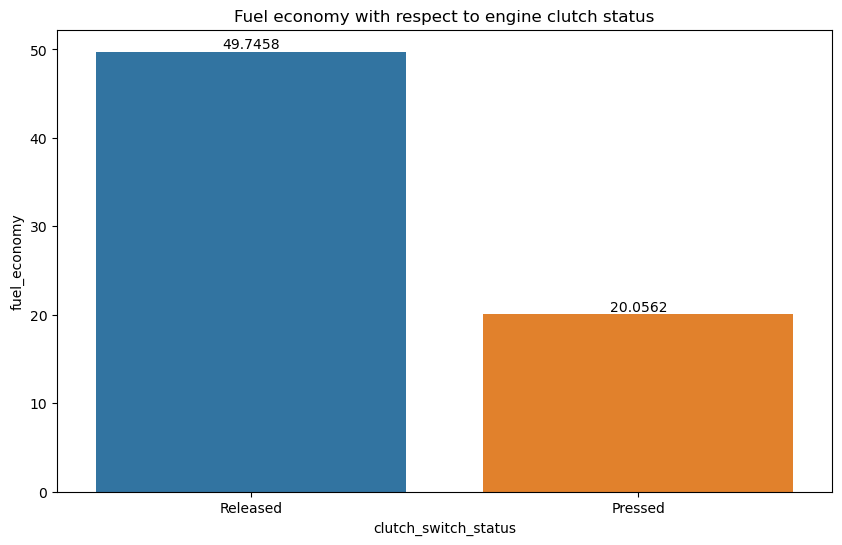

In [77]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=cleaned_df, x='clutch_switch_status', y='fuel_economy', errorbar=None)
plt.title('Fuel economy with respect to engine clutch status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## This barplot shows that, if the clutch pressed is less than the fuel economy is more.

Text(0.5, 1.0, 'Relationship between coolant and vehicle speed')

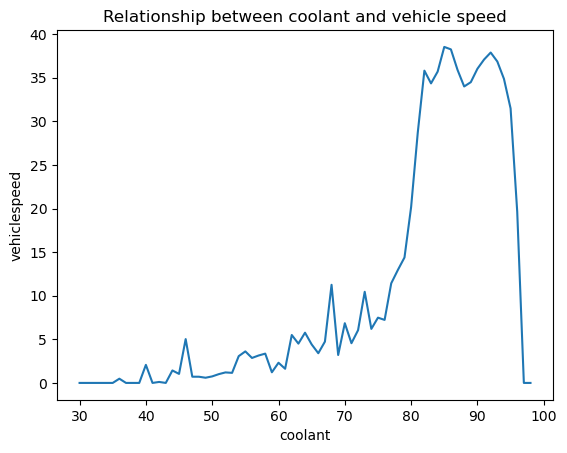

In [46]:
sns.lineplot(data= cleaned_df, x= 'coolant', y= 'vehiclespeed',errorbar=None)
plt.title("Relationship between coolant and vehicle speed")

## This relationship highlights, how vehicle speed influences the demand on the cooling system, requiring more efficient heat dissipation through coolant circulation.

Text(0.5, 1.0, 'Relationship between fuel rate and engine load')

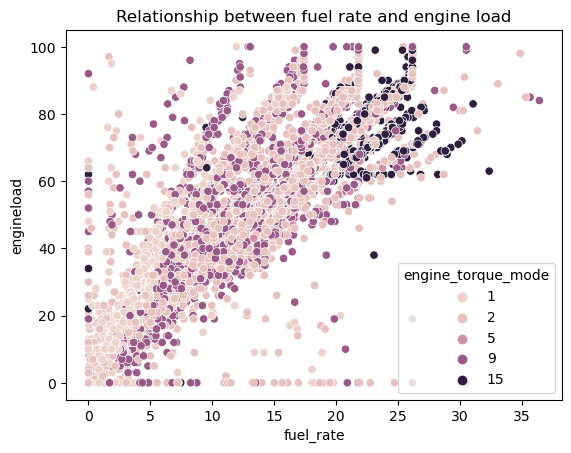

In [54]:
sns.scatterplot(data=cleaned_df, x="fuel_rate", y="engineload",hue="engine_torque_mode")
plt.title("Relationship between fuel rate and engine load")

## In this relationship it shows, in high engine load vehicle required more torque and if torque is increased than it affects the fuel rate

In [47]:
cleaned_df.shape

(18434, 30)

In [56]:
# Feature Engineering

cleaned_df['engine_performance']= cleaned_df['engine_torque_percent']/(cleaned_df['engineload']+1)
cleaned_df.head()

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,engine_performance
0,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,1970.85,21,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,100.0,102,215,0,1,102,Released,Released,Pressed,85.0,0.724138
1,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,1970.85,18,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,0,99.6,102,215,19,2,102,Released,Pressed,Pressed,85.0,0.782609
2,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,1970.85,18,130,129,17936.0,22.8,83.22,4.70,0.337891,0.0,0,99.6,102,215,0,1,102,Pressed,Pressed,Released,85.0,0.692308
3,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,1970.90,27,130,129,17936.0,20.4,74.46,8.60,0.121094,33.6,0,99.6,102,215,28,2,102,Released,Pressed,Released,85.0,0.750000
4,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,1970.90,1,130,3,17936.0,23.2,84.68,0.00,125.500000,3.2,0,100.0,102,215,1,2,102,Released,Pressed,Released,85.0,1.000000


## Standardized numerical columns (transforming numerical features to a standard scale with a mean '0' and variance '1')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select numerical columns to be standardized
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the selected columns
cleaned_df[numerical_columns] = scaler.fit_transform(cleaned_df[numerical_columns])

# Display the standardized DataFrame
cleaned_df[numerical_columns].head()
